In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df1=df.drop(['unique_id'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
dfnomissing=df1.dropna()
dfnomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11794 non-null  float64
 1   h1n1_awareness             11794 non-null  float64
 2   antiviral_medication       11794 non-null  float64
 3   contact_avoidance          11794 non-null  float64
 4   bought_face_mask           11794 non-null  float64
 5   wash_hands_frequently      11794 non-null  float64
 6   avoid_large_gatherings     11794 non-null  float64
 7   reduced_outside_home_cont  11794 non-null  float64
 8   avoid_touch_face           11794 non-null  float64
 9   dr_recc_h1n1_vacc          11794 non-null  float64
 10  dr_recc_seasonal_vacc      11794 non-null  float64
 11  chronic_medic_condition    11794 non-null  float64
 12  cont_child_undr_6_mnths    11794 non-null  float64
 13  is_health_worker           11794 non-null  flo

In [ ]:
df2=df1.drop(['has_health_insur'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
df3=df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [ ]:
df3.h1n1_vaccine.isnull().sum()
df3.h1n1_vaccine.value_counts()

0    15128
1     4514
Name: h1n1_vaccine, dtype: int64

Text(0.5, 1.0, 'Barplot of h1n1_vaccine')

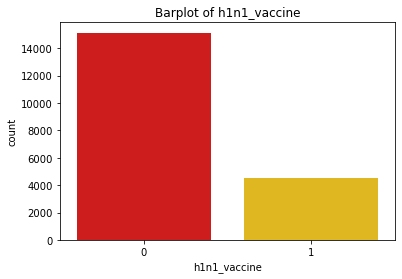

In [ ]:
sns.countplot(x='h1n1_vaccine',data=df3,palette='hot')
plt.title('Barplot of h1n1_vaccine')

Text(0.5, 1.0, 'Histogram of h1n1_worry')

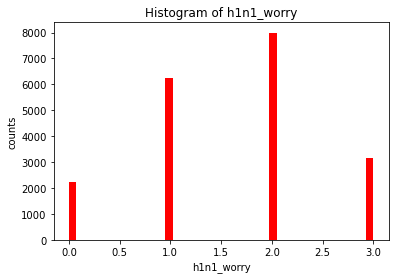

In [ ]:
plt.hist(df3.h1n1_worry,bins='auto',facecolor='red')
plt.xlabel('h1n1_worry')
plt.ylabel('counts')
plt.title('Histogram of h1n1_worry')

<AxesSubplot:>

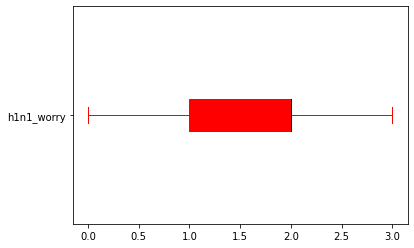

In [ ]:
props2=dict(boxes='red',whiskers='green',medians='black',caps='red')
df3['h1n1_worry'].plot.box(color=props2,patch_artist=True,vert=False)


In [ ]:
df3.h1n1_worry.isnull().sum()
df3.h1n1_worry.value_counts()

2.0    7989
1.0    6229
3.0    3175
0.0    2249
Name: h1n1_worry, dtype: int64

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols

# Iterate over the list of 31 fields (excluding 'h1n1_vaccine' which is the independent variable)
for col in df3.columns:
    if col != 'h1n1_vaccine':  # Exclude the independent variable
        formula = f'{col} ~ h1n1_vaccine'  # Build the formula dynamically with the current column as the dependent variable
        mod = ols(formula, data=df3).fit()  # Fit the OLS model
        aov = sm.stats.anova_lm(mod)  # Perform the ANOVA
        print(f"ANOVA for {col}:\n", aov)
    # 0 -19 are numerical but others are catogorical

ANOVA for h1n1_worry:
                    df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN
ANOVA for h1n1_awareness:
                    df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN
ANOVA for antiviral_medication:
                    df      sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0    1.209693  1.209693  25.77419  3.872929e-07
Residual      19640.0  921.789034  0.046934       NaN           NaN
ANOVA for contact_avoidance:
                    df       sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0     7.325788  7.325788  38.18928  6.546853e-10
Residual      19640.0  3767.509362  0.191828       NaN           NaN
ANOVA for bought_face_mask:
       

ValueError: endog has evaluated to an array with multiple columns that has shape (19642, 5). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

## h1n1_awareness [0,1,2] ordered

In [ ]:
df3.h1n1_awareness.value_counts()

1.0    10861
2.0     7362
0.0     1419
Name: h1n1_awareness, dtype: int64

Text(0.5, 1.0, 'Histogram of h1n1_awareness')

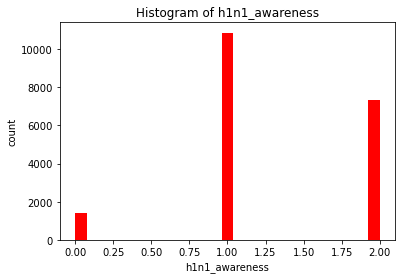

In [ ]:
plt.hist(df3.h1n1_awareness, bins='auto', facecolor='red')
plt.xlabel('h1n1_awareness')
plt.ylabel('count')
plt.title('Histogram of h1n1_awareness')

<AxesSubplot:>

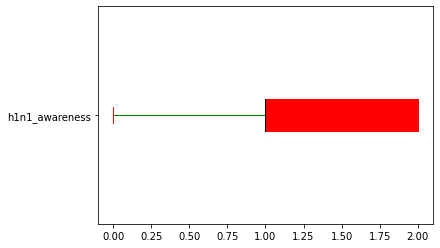

In [ ]:
props2=dict(boxes='red', whiskers='green', medians='black', caps='red')
df3['h1n1_awareness'].plot.box(color=props2, patch_artist=True, vert=False)#No outliersv

Text(0.5, 1.0, 'Barplot of h1n1_awareness')

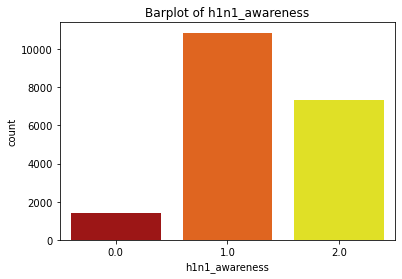

In [ ]:
sns.countplot(x='h1n1_awareness', data=df3 , palette='hot')
plt.title('Barplot of h1n1_awareness')

## antiviral_medication [0 and 1]

In [ ]:
df3.antiviral_medication.isnull().sum()

0

In [ ]:
df3.antiviral_medication.value_counts()

0.0    18671
1.0      971
Name: antiviral_medication, dtype: int64

Text(0.5, 1.0, 'Barplot of antiviral_medication')

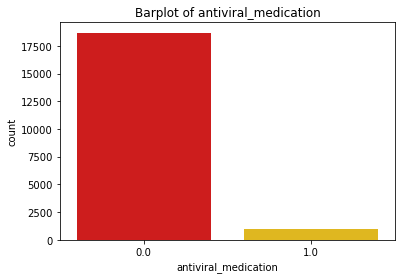

In [ ]:
sns.countplot(x='antiviral_medication', data=df3 , palette='hot')
plt.title('Barplot of antiviral_medication')

In [ ]:
ct_antiviral=pd.crosstab(df3.h1n1_vaccine,df3.antiviral_medication)
chi2_contingency(ct_antiviral,correction=False)

(25.7430310280289,
 3.900328532557542e-07,
 1,
 array([[14380.14906832,   747.85093168],
        [ 4290.85093168,   223.14906832]]))

## contact_avoidance [0 and 1]

In [ ]:
df3.contact_avoidance.isnull().sum()

0

In [ ]:
df3.contact_avoidance.value_counts()

1.0    14544
0.0     5098
Name: contact_avoidance, dtype: int64

Text(0.5, 1.0, 'Barplot of contact_avoidance')

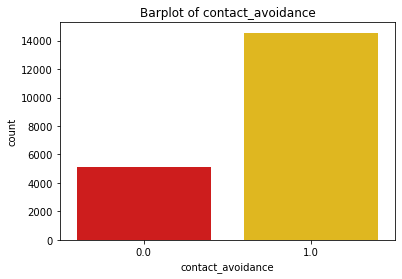

In [ ]:
sns.countplot(x='contact_avoidance', data=df3 , palette='hot')
plt.title('Barplot of contact_avoidance')

In [ ]:
ct_contact=pd.crosstab(df3.h1n1_vaccine,df3.contact_avoidance)
chi2_contingency(ct_contact,correction=False)

(38.119047488867295,
 6.655721920427935e-10,
 1,
 array([[ 3926.40993789, 11201.59006211],
        [ 1171.59006211,  3342.40993789]]))

## bought_face_mask [0 and 1]

In [ ]:
df3.bought_face_mask.isnull().sum()

0

In [ ]:
df3.bought_face_mask.value_counts()

0.0    18312
1.0     1330
Name: bought_face_mask, dtype: int64

Text(0.5, 1.0, 'Barplot of bought_face_mask')

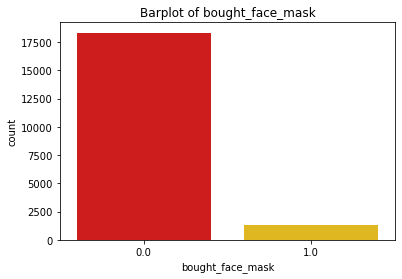

In [ ]:
sns.countplot(x='bought_face_mask', data=df3 , palette='hot')
plt.title('Barplot of bought_face_mask')

In [ ]:
ct_mask=pd.crosstab(df3.h1n1_vaccine, df3.bought_face_mask)
chi2_contingency(ct_mask, correction = False)

(111.38079745607507,
 4.8829999983371125e-26,
 1,
 array([[14103.65217391,  1024.34782609],
        [ 4208.34782609,   305.65217391]]))

## wash_hands_frequently [0 and 1]

In [ ]:
df3.wash_hands_frequently.isnull().sum()

0

In [ ]:
df3.wash_hands_frequently.value_counts()

1.0    16399
0.0     3243
Name: wash_hands_frequently, dtype: int64

Text(0.5, 1.0, 'Barplot of wash_hands_frequently')

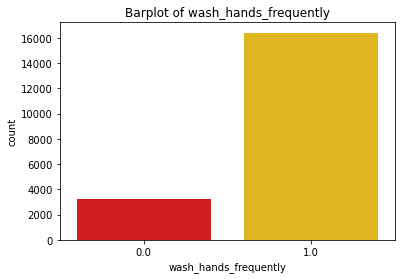

In [ ]:
sns.countplot(x='wash_hands_frequently', data=df3 , palette='hot')
plt.title('Barplot of wash_hands_frequently')

In [ ]:
ct_wash=pd.crosstab(df3.h1n1_vaccine, df3.wash_hands_frequently)
chi2_contingency(ct_wash, correction = False)

(111.62137100015417,
 4.32500265148964e-26,
 1,
 array([[ 2497.71428571, 12630.28571429],
        [  745.28571429,  3768.71428571]]))

## avoid_large_gatherings [0 and 1]

In [ ]:
df3.avoid_large_gatherings.isnull().sum()

0

In [ ]:
df3.avoid_large_gatherings.value_counts()

0.0    12703
1.0     6939
Name: avoid_large_gatherings, dtype: int64

Text(0.5, 1.0, 'Barplot of avoid_large_gatherings')

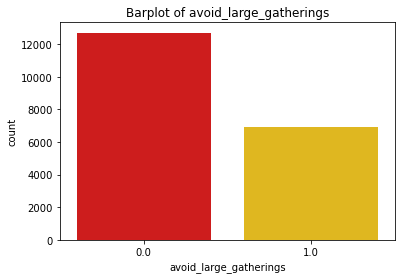

In [ ]:
sns.countplot(x='avoid_large_gatherings', data=df3 , palette='hot')
plt.title('Barplot of avoid_large_gatherings')

In [ ]:
ct_gath=pd.crosstab(df3.h1n1_vaccine, df3.avoid_large_gatherings)
chi2_contingency(ct_gath, correction = False)

(8.326019959345679,
 0.003908118862931521,
 1,
 array([[9783.67701863, 5344.32298137],
        [2919.32298137, 1594.67701863]]))

## reduced_outside_home_cont [0 and 1]

In [ ]:
df3.reduced_outside_home_cont.isnull().sum()

0

In [ ]:
df3.reduced_outside_home_cont.value_counts()

0.0    13159
1.0     6483
Name: reduced_outside_home_cont, dtype: int64

Text(0.5, 1.0, 'Barplot of reduced_outside_home_cont')

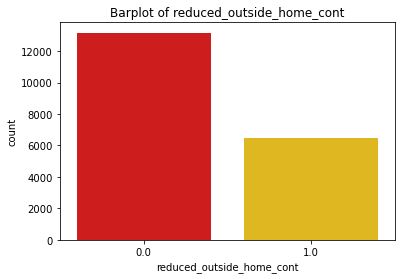

In [ ]:
sns.countplot(x='reduced_outside_home_cont', data=df3 , palette='hot')
plt.title('Barplot of reduced_outside_home_cont')

In [ ]:
ct_outside=pd.crosstab(df3.h1n1_vaccine, df3.reduced_outside_home_cont)
chi2_contingency(ct_outside, correction = False)

(5.859941970831115,
 0.015489304669565737,
 1,
 array([[10134.88198758,  4993.11801242],
        [ 3024.11801242,  1489.88198758]]))

## avoid_touch_face [0 and 1]

In [ ]:
df3.avoid_touch_face.isnull().sum()

0

In [ ]:
df3.avoid_touch_face.value_counts()

1.0    13455
0.0     6187
Name: avoid_touch_face, dtype: int64

Text(0.5, 1.0, 'Barplot of avoid_touch_face')

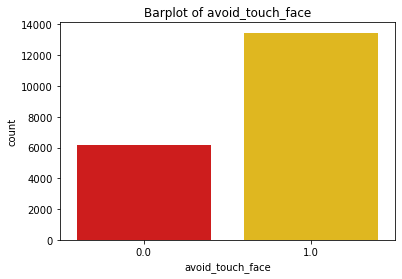

In [ ]:
sns.countplot(x='avoid_touch_face', data=df3 , palette='hot')
plt.title('Barplot of avoid_touch_face')

In [ ]:
ct_face=pd.crosstab(df3.h1n1_vaccine, df3.avoid_touch_face)
chi2_contingency(ct_face, correction = False)

(99.97660321127165,
 1.5420802703508326e-23,
 1,
 array([[ 4765.14285714, 10362.85714286],
        [ 1421.85714286,  3092.14285714]]))

## dr_recc_h1n1_vacc [0 and 1]

In [ ]:
df3.dr_recc_h1n1_vacc.isnull().sum()

0

In [ ]:
df3.dr_recc_h1n1_vacc.value_counts()

0.0    15203
1.0     4439
Name: dr_recc_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of dr_recc_h1n1_vacc')

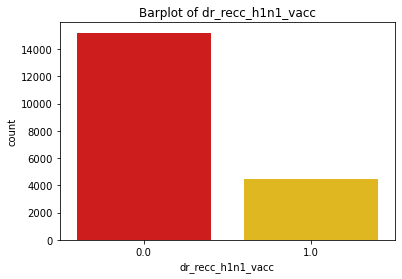

In [ ]:
sns.countplot(x='dr_recc_h1n1_vacc', data=df3 , palette='hot')
plt.title('Barplot of dr_recc_h1n1_vacc')

In [ ]:
ct_face=pd.crosstab(df3.h1n1_vaccine, df3.dr_recc_h1n1_vacc)
chi2_contingency(ct_face, correction = False)

(3094.6916755786597,
 0.0,
 1,
 array([[11709.14285714,  3418.85714286],
        [ 3493.85714286,  1020.14285714]]))

## dr_recc_seasonal_vacc [0 and 1]

In [ ]:
df3.dr_recc_seasonal_vacc.isnull().sum()

0

In [ ]:
df3.dr_recc_seasonal_vacc.value_counts()

0.0    13091
1.0     6551
Name: dr_recc_seasonal_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of dr_recc_seasonal_vacc')

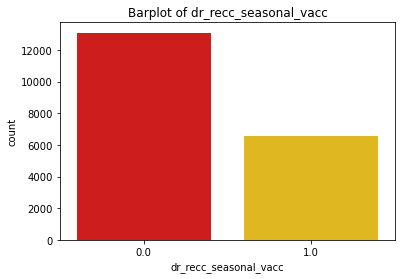

In [ ]:
sns.countplot(x='dr_recc_seasonal_vacc', data=df3 , palette='hot')
plt.title('Barplot of dr_recc_seasonal_vacc')

In [ ]:
ct_face=pd.crosstab(df3.h1n1_vaccine, df3.dr_recc_seasonal_vacc)
chi2_contingency(ct_face, correction = False)

(875.3779473401858,
 2.21025047497519e-192,
 1,
 array([[10082.50931677,  5045.49068323],
        [ 3008.49068323,  1505.50931677]]))

## chronic_medic_condition [0 and 1]



In [ ]:
df3.chronic_medic_condition.isnull().sum()

0

In [ ]:
df3.chronic_medic_condition.value_counts()

0.0    14066
1.0     5576
Name: chronic_medic_condition, dtype: int64

Text(0.5, 1.0, 'Barplot of chronic_medic_condition')

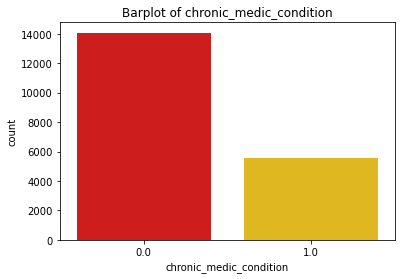

In [ ]:
sns.countplot(x='chronic_medic_condition', data=df3 , palette='hot')
plt.title('Barplot of chronic_medic_condition')

In [ ]:
ct_face=pd.crosstab(df3.h1n1_vaccine, df3.chronic_medic_condition)
chi2_contingency(ct_face, correction = False)

(219.14944840010486,
 1.3864754403096512e-49,
 1,
 array([[10833.44099379,  4294.55900621],
        [ 3232.55900621,  1281.44099379]]))

## cont_child_undr_6_mnths [0 and 1]

In [ ]:
df3.cont_child_undr_6_mnths.isnull().sum()

0

In [ ]:
df3.cont_child_undr_6_mnths.value_counts()

0.0    17995
1.0     1647
Name: cont_child_undr_6_mnths, dtype: int64

Text(0.5, 1.0, 'Barplot of cont_child_undr_6_mnths')

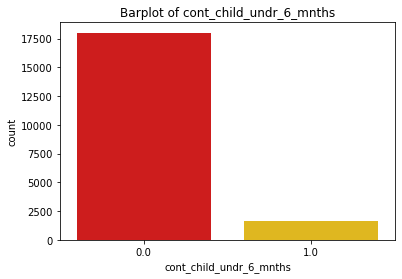

In [ ]:
sns.countplot(x='cont_child_undr_6_mnths', data=df3 , palette='hot')
plt.title('Barplot of cont_child_undr_6_mnths')

In [ ]:
ct_face=pd.crosstab(df3.h1n1_vaccine, df3.cont_child_undr_6_mnths)
chi2_contingency(ct_face, correction = False)

(110.12378230842235,
 9.205896231946304e-26,
 1,
 array([[13859.50310559,  1268.49689441],
        [ 4135.49689441,   378.50310559]]))

In [ ]:
## is_health_worker [0 and 1]

In [ ]:
df3.is_health_worker.isnull().sum()

0

In [ ]:
df3.is_health_worker.value_counts()

0.0    17310
1.0     2332
Name: is_health_worker, dtype: int64

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

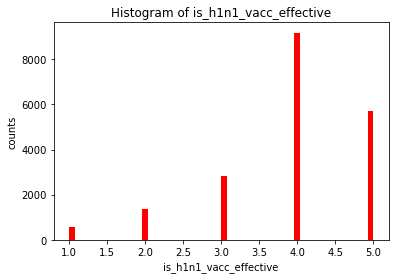

In [ ]:
plt.hist(df3.is_h1n1_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_vacc_effective')

<AxesSubplot:>

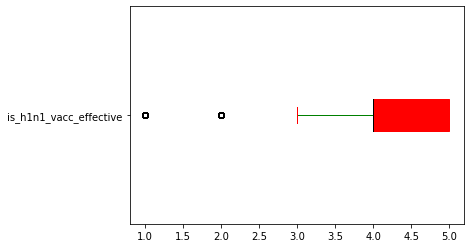

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df3['is_h1n1_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
# few outliers on lower side; IGNORE!
df3.is_h1n1_vacc_effective.isnull().sum() #0 Missing values
df3.is_h1n1_vacc_effective.value_counts()

4.0    9172
5.0    5715
3.0    2838
2.0    1347
1.0     570
Name: is_h1n1_vacc_effective, dtype: int64

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

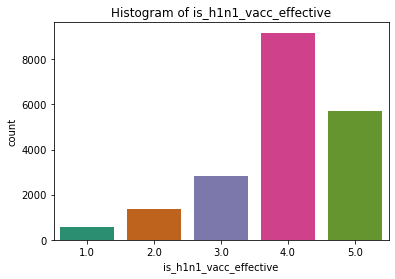

In [ ]:
sns.countplot(x = 'is_h1n1_vacc_effective', data = df3, palette = 'Dark2')
plt.title('Histogram of is_h1n1_vacc_effective')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('is_h1n1_vacc_effective ~ h1n1_vaccine', data = df3).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   1411.109998  1411.109998  1579.950867     0.0
Residual      19640.0  17541.178618     0.893135          NaN     NaN


In [ ]:
mod = ols('is_h1n1_risky ~ h1n1_vaccine', data = df3).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   4134.782428  4134.782428  2838.602067     0.0
Residual      19640.0  28608.140543     1.456626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_h1n1_vacc')

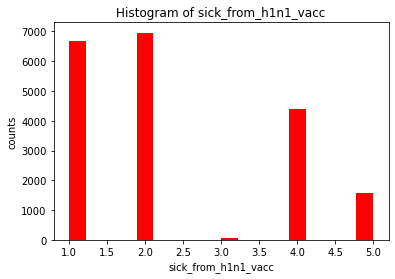

In [ ]:
plt.hist(df3.sick_from_h1n1_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_h1n1_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_h1n1_vacc')

<AxesSubplot:>

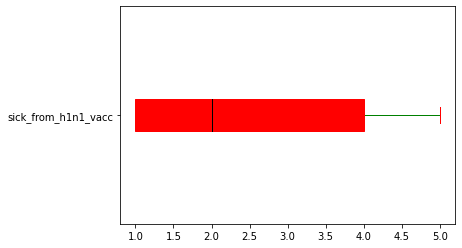

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df3['sick_from_h1n1_vacc'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df3.sick_from_h1n1_vacc.isnull().sum() #0 Missing values
df3.sick_from_h1n1_vacc.value_counts()

2.0    6956
1.0    6684
4.0    4390
5.0    1560
3.0      52
Name: sick_from_h1n1_vacc, dtype: int64

In [ ]:
mod = ols(' sick_from_h1n1_vacc~ h1n1_vaccine', data = df3).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    246.018980  246.018980  135.282692  3.623260e-31
Residual      19640.0  35716.414988    1.818555         NaN           NaN


Text(0.5, 1.0, 'Histogram of is_seas_vacc_effective')

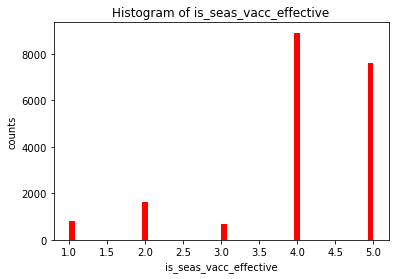

In [ ]:
plt.hist(df3.is_seas_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_seas_vacc_effective')

<AxesSubplot:>

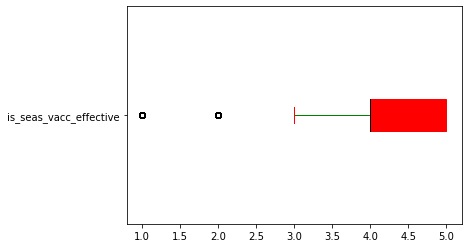

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df3['is_seas_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df3.is_seas_vacc_effective.isnull().sum() #0 Missing values
df3.is_seas_vacc_effective.value_counts()

4.0    8906
5.0    7603
2.0    1638
1.0     822
3.0     673
Name: is_seas_vacc_effective, dtype: int64

In [ ]:
mod = ols('is_seas_vacc_effective~ h1n1_vaccine', data = df3).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq     mean_sq           F         PR(>F)
h1n1_vaccine      1.0    763.264159  763.264159  700.789605  9.196705e-152
Residual      19640.0  21390.882466    1.089149         NaN            NaN


Text(0.5, 1.0, 'Histogram of is_seas_risky')

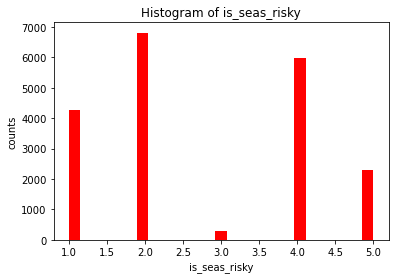

In [ ]:
plt.hist(df3.is_seas_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_risky')
plt.ylabel('counts')
plt.title('Histogram of is_seas_risky')

<AxesSubplot:>

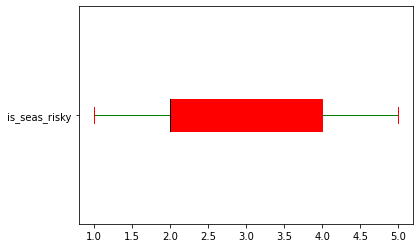

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df3['is_seas_risky'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df3.is_seas_risky.isnull().sum() #0 Missing values
df3.is_seas_risky.value_counts()

2.0    6811
4.0    5984
1.0    4258
5.0    2286
3.0     303
Name: is_seas_risky, dtype: int64

In [ ]:
mod = ols('is_seas_risky~ h1n1_vaccine', data = df3).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   2938.840524  2938.840524  1655.101131     0.0
Residual      19640.0  34873.293730     1.775626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_seas_vacc')

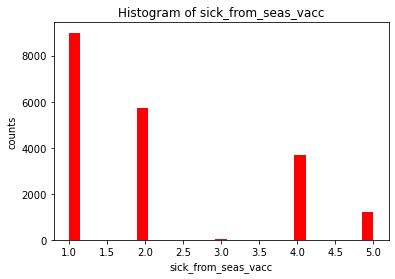

In [ ]:
plt.hist(df3.sick_from_seas_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_seas_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_seas_vacc')

<AxesSubplot:>

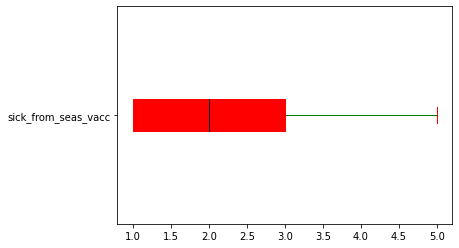

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df3['sick_from_seas_vacc'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df3.sick_from_seas_vacc.isnull().sum() #0 Missing values
df3.sick_from_seas_vacc.value_counts()

1.0    8996
2.0    5713
4.0    3683
5.0    1221
3.0      29
Name: sick_from_seas_vacc, dtype: int64

In [ ]:
mod = ols('sick_from_seas_vacc~ h1n1_vaccine', data = df3).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      1.496253  1.496253  0.851088  0.356256
Residual      19640.0  34528.036789  1.758047       NaN       NaN


In [ ]:
df3['age_bracket'] = df3.get('age_bracket').replace('65+ Years', 5)
df3['age_bracket'] = df3.get('age_bracket').replace('55 - 64 Years', 4)
df3['age_bracket'] = df3.get('age_bracket').replace('45 - 54 Years', 3)
df3['age_bracket'] = df3.get('age_bracket').replace('18 - 34 Years', 1)
df3['age_bracket'] = df3.get('age_bracket').replace('35 - 44 Years', 2)

In [ ]:
df3.age_bracket.isnull().sum() #0 Missing values
df3.age_bracket.value_counts()

5    4491
4    4234
3    4038
1    3925
2    2954
Name: age_bracket, dtype: int64

<AxesSubplot:>

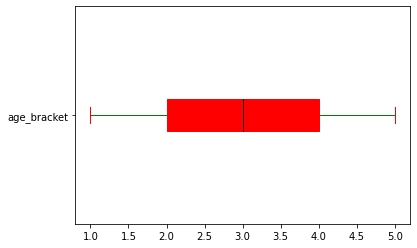

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df3['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False)